In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/dataset.csv")
df.head(10)

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9
5,Camp Murray,20171204,1430,47.11,-122.57,84,2.017120e+11,12,14,Winter,47.10083,18.12363,2.92027,0,5.0,1023.7,722
6,Camp Murray,20171205,1115,47.11,-122.57,84,2.017120e+11,12,11,Winter,43.55469,19.41269,3.41284,0,4.0,1025.7,722
7,Camp Murray,20171205,1200,47.11,-122.57,84,2.017120e+11,12,12,Winter,30.56641,23.90930,4.82020,5,7.0,1026.0,722
8,Camp Murray,20171205,1300,47.11,-122.57,84,2.017120e+11,12,13,Winter,17.90771,32.32346,5.98127,5,10.0,1025.7,722
9,Camp Murray,20171205,1400,47.11,-122.57,84,2.017120e+11,12,14,Winter,14.40430,35.41267,4.96121,6,10.0,1025.4,722


In [ ]:
newDf = df.drop("YRMODAHRMI" , axis ="columns")
df = newDf
df.head(5)

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   Month          21045 non-null  int64  
 7   Hour           21045 non-null  int64  
 8   Season         21045 non-null  object 
 9   Humidity       21045 non-null  float64
 10  AmbientTemp    21045 non-null  float64
 11  PolyPwr        21045 non-null  float64
 12  Wind.Speed     21045 non-null  int64  
 13  Visibility     21045 non-null  float64
 14  Pressure       21045 non-null  float64
 15  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 2.6+ MB


finding the corelation matrix to find the dependance of the variables on the target variable

dropping the altitude column because it has less relation on the target variable as can be seen in the corelation matrix

In [ ]:
newDf = df.drop("Altitude", axis = "columns")
df = newDf
df.head(5)

,Location,Date,Time,Latitude,Longitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


encoding the string data into numerical data

In [ ]:
# Encode location data
df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)
# Encode season data
df_with_loc_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

df.head(10)

,Location,Date,Time,Latitude,Longitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9
5,Camp Murray,20171204,1430,47.11,-122.57,12,14,Winter,47.10083,18.12363,2.92027,0,5.0,1023.7,722
6,Camp Murray,20171205,1115,47.11,-122.57,12,11,Winter,43.55469,19.41269,3.41284,0,4.0,1025.7,722
7,Camp Murray,20171205,1200,47.11,-122.57,12,12,Winter,30.56641,23.90930,4.82020,5,7.0,1026.0,722
8,Camp Murray,20171205,1300,47.11,-122.57,12,13,Winter,17.90771,32.32346,5.98127,5,10.0,1025.7,722
9,Camp Murray,20171205,1400,47.11,-122.57,12,14,Winter,14.40430,35.41267,4.96121,6,10.0,1025.4,722


Secondly, let’s create cyclic features using month and hour data. It should be noted that only data between 10 am and 3 pm is available which cuts out the period when the systems are not expected to generate power.

In [ ]:

min_hour_of_interest = 10
max_hour_of_interest = 15
# Calculate time lapse since onset of power generation
df_with_loc_season_en['delta_hr']= df_with_loc_season_en.Hour-min_hour_of_interest
# Create cyclic month features
df_with_loc_season_en['sine_mon']=np.sin((df_with_loc_season_en.Month - 1)*np.pi/11)
df_with_loc_season_en['cos_mon']= np.cos((df_with_loc_season_en.Month - 1)*np.pi/11)
# Create cyclic hour features
df_with_loc_season_en['sine_hr']= np.sin((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest- min_hour_of_interest)))
df_with_loc_season_en['cos_hr']= np.cos((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest- min_hour_of_interest)))# Define time bounds in data

In [ ]:
data = df_with_loc_season_en
data.info()
data.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21045 non-null  int64  
 1   Time                 21045 non-null  int64  
 2   Latitude             21045 non-null  float64
 3   Longitude            21045 non-null  float64
 4   Month                21045 non-null  int64  
 5   Hour                 21045 non-null  int64  
 6   Humidity             21045 non-null  float64
 7   AmbientTemp          21045 non-null  float64
 8   PolyPwr              21045 non-null  float64
 9   Wind.Speed           21045 non-null  int64  
 10  Visibility           21045 non-null  float64
 11  Pressure             21045 non-null  float64
 12  Cloud.Ceiling        21045 non-null  int64  
 13  Location_Grissom     21045 non-null  uint8  
 14  Location_Hill Weber  21045 non-null  uint8  
 15  Location_JDMT        21045 non-null 

,Date,Time,Latitude,Longitude,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,...,Location_Travis,Location_USAFA,Season_Spring,Season_Summer,Season_Winter,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr
0,20171203,1145,47.11,-122.57,12,11,81.71997,12.86919,2.42769,5,...,0,0,0,0,1,1,5.665539e-16,-1.0,5.877853e-01,0.809017
1,20171203,1315,47.11,-122.57,12,13,96.64917,9.66415,2.46273,0,...,0,0,0,0,1,3,5.665539e-16,-1.0,9.510565e-01,-0.309017
2,20171203,1330,47.11,-122.57,12,13,93.61572,15.44983,4.46836,5,...,0,0,0,0,1,3,5.665539e-16,-1.0,9.510565e-01,-0.309017
3,20171204,1230,47.11,-122.57,12,12,77.21558,10.36659,1.65364,5,...,0,0,0,0,1,2,5.665539e-16,-1.0,9.510565e-01,0.309017
4,20171204,1415,47.11,-122.57,12,14,54.80347,16.85471,6.57939,3,...,0,0,0,0,1,4,5.665539e-16,-1.0,5.877853e-01,-0.809017
5,20171204,1430,47.11,-122.57,12,14,47.10083,18.12363,2.92027,0,...,0,0,0,0,1,4,5.665539e-16,-1.0,5.877853e-01,-0.809017
6,20171205,1115,47.11,-122.57,12,11,43.55469,19.41269,3.41284,0,...,0,0,0,0,1,1,5.665539e-16,-1.0,5.877853e-01,0.809017
7,20171205,1200,47.11,-122.57,12,12,30.56641,23.90930,4.82020,5,...,0,0,0,0,1,2,5.665539e-16,-1.0,9.510565e-01,0.309017
8,20171205,1300,47.11,-122.57,12,13,17.90771,32.32346,5.98127,5,...,0,0,0,0,1,3,5.665539e-16,-1.0,9.510565e-01,-0.309017
9,20171205,1400,47.11,-122.57,12,14,14.40430,35.41267,4.96121,6,...,0,0,0,0,1,4,5.665539e-16,-1.0,5.877853e-01,-0.809017


In [ ]:
x = data.drop(["PolyPwr"] , axis =1)
y = data["PolyPwr"]

splitting the data into training and testing split to facilitate the training of the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state=104,train_size=0.8, shuffle=True)


applying the random forest classifier to the data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=109,random_state=101)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=109, random_state=101)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([13.89556266, 10.01875138, 14.54791092, ..., 11.97964615,
        4.79300303, 16.74938798])

In [ ]:
# for clear sky
da = x.iloc[0:1 , :]
dy = y.iloc[0:1]
y_pred_=regressor.predict(da)
print("Original Value:",dy)
print("Predicted Value:",y_pred_)
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(dy,y_pred_))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(dy,y_pred_)))

Original Value: 0    2.42769
Name: PolyPwr, dtype: float64
Predicted Value: [2.45766917]
Mean Absolute Error: 0.029979174311929757
Root Mean Squared Error: 0.029979174311929757


In [ ]:
# for cloudy
da = x.iloc[16:17 , :]
dy = y.iloc[16:17]
y_pred_=regressor.predict(da)
print("Original Value:",dy)
print("Predicted Value:",y_pred_)
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(dy,y_pred_))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(dy,y_pred_)))

Original Value: 16    1.45144
Name: PolyPwr, dtype: float64
Predicted Value: [1.68257064]
Mean Absolute Error: 0.2311306422018331
Root Mean Squared Error: 0.2311306422018331


In [ ]:
# for partially cloudy
da = x.iloc[42:43 , :]
dy = y.iloc[42:43]
y_pred_=regressor.predict(da)
print("Original Value:",dy)
print("Predicted Value:",y_pred_)
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(dy,y_pred_))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(dy,y_pred_)))

Original Value: 42    1.82956
Name: PolyPwr, dtype: float64
Predicted Value: [2.24471569]
Mean Absolute Error: 0.41515568807339354
Root Mean Squared Error: 0.41515568807339354


checking the accuracy of the model trained by the random forest classifier by checking the errors in form of mean absolute and rms

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2.5711251112404394
Root Mean Squared Error: 3.934670847598762


In [ ]:
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

training another model using the light gradient boosting machine

In [ ]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


In [ ]:
model = lgb.train(params,train_set=lgb_train,valid_sets=lgb_eval,early_stopping_rounds=30)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l2: 45.653	valid_0's l1: 5.82823
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 41.9968	valid_0's l1: 5.57768
[3]	valid_0's l2: 38.8116	valid_0's l1: 5.35204
[4]	valid_0's l2: 36.207	valid_0's l1: 5.15331
[5]	valid_0's l2: 33.9522	valid_0's l1: 4.97214
[6]	valid_0's l2: 32.0449	valid_0's l1: 4.8119
[7]	valid_0's l2: 30.4627	valid_0's l1: 4.66201
[8]	valid_0's l2: 29.0636	valid_0's l1: 4.52864
[9]	valid_0's l2: 27.8406	valid_0's l1: 4.40748
[10]	valid_0's l2: 26.8848	valid_0's l1: 4.30209
[11]	valid_0's l2: 26.0007	valid_0's l1: 4.20624
[12]	valid_0's l2: 25.2375	valid_0's l1: 4.12189
[13]	valid_0's l2: 24.5495	valid_0's l1: 4.03711
[14]	valid_0's l2: 23.891	valid_0's l1: 3.95517
[15]	valid_0's l2: 23.3576	valid_0's l1: 3.88443
[16]	valid_0's l2: 22.8284	valid_0's l1: 3.81885
[17]	valid_0's l2: 22.4332	valid_0's l1: 3.76285
[18]	valid_0's l2: 22.0055	valid_0's l1: 3.70288
[19]	valid_0's l

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2.9034933476824873
Root Mean Squared Error: 4.138632041507493


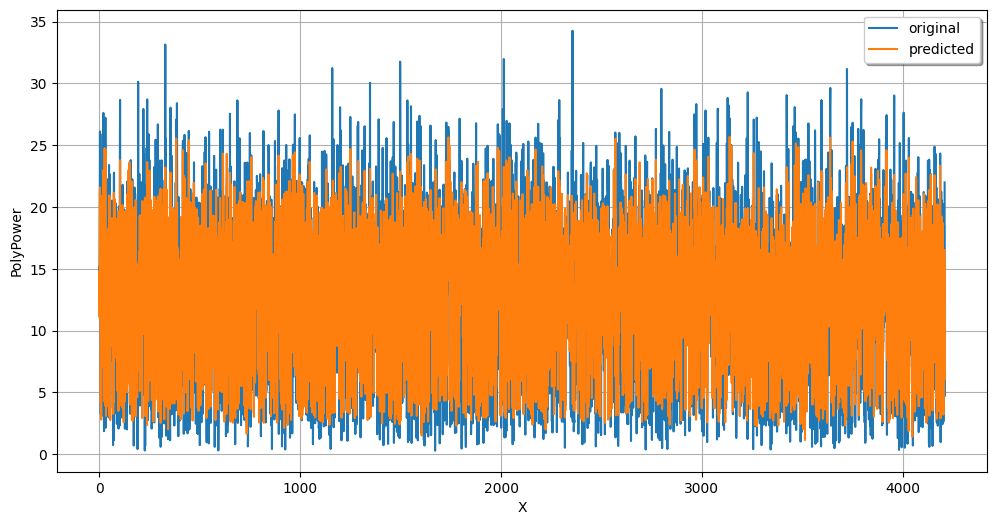

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.xlabel('X')
plt.ylabel('PolyPower')
plt.legend(loc='best',fancybox=True, shadow=True)

plt.grid(True)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

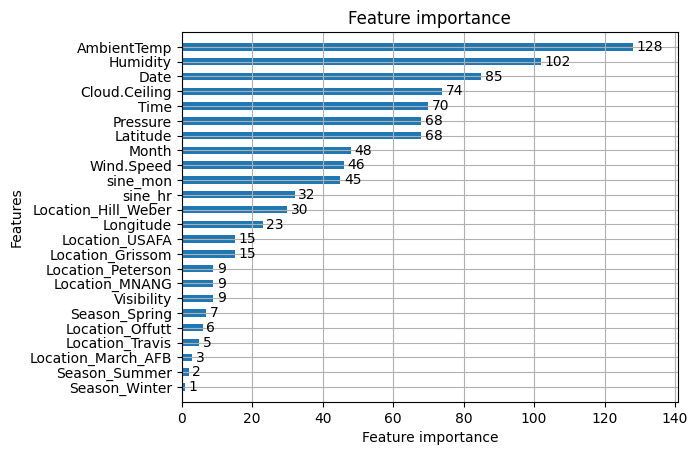

In [ ]:
lgb.plot_importance(model, height=.5)